<center><font color=magenta face=georgia><h1>Importing Data

In [1]:
import pandas as pd
df = pd.read_csv('Customer Data.csv')
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<center><h1><font face=georgia color=magenta>Data Cleaning and Preprocessing

<h3><font face=verdona color=green>Dropping ID column as all of the values are unique and doesn't bring any value to the data

In [3]:
df.drop(columns=['CUST_ID'], inplace=True)

<h2><font face=verdona color=green>Dropping duplicate records

In [4]:
df.duplicated().sum()

0

<h2><font face=verdona color=green>Handling Missing values

In [5]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

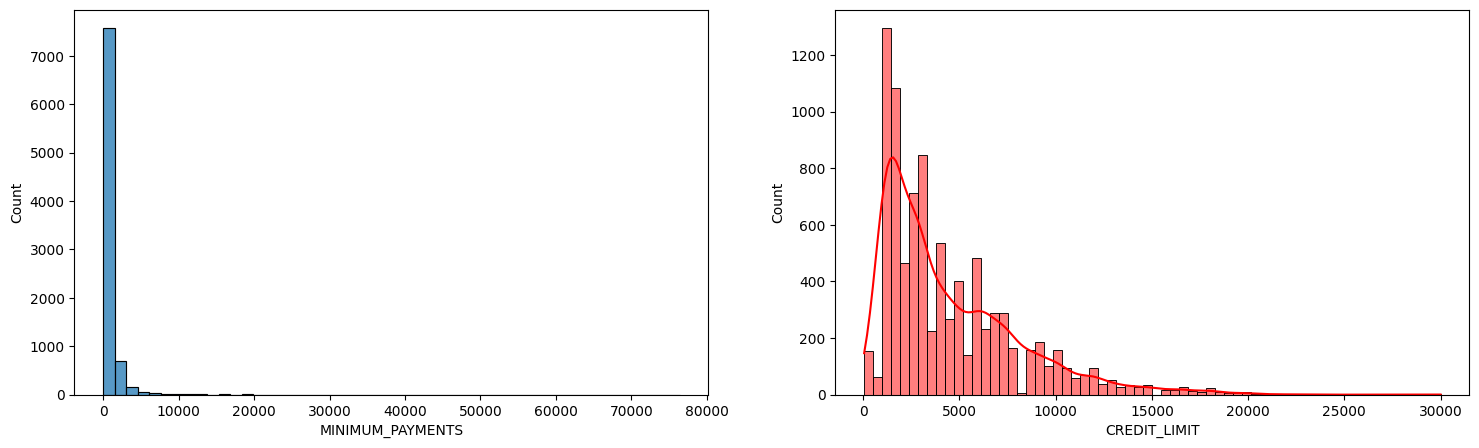

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18,5))
sns.histplot(x=df['MINIMUM_PAYMENTS'],bins=50, ax=ax[0])
sns.histplot(x=df['CREDIT_LIMIT'], color='red', kde=True, ax=ax[1])
plt.show()

<b>The data is unevenly distributed/right skewed in both columns thus I will fill the missing values with median

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [8]:
df.isnull().sum().sum()

0

<h2><font face=verdona color=green>Data in entirely Numeric

<center><h1><font face=georgia color=magenta>EDA

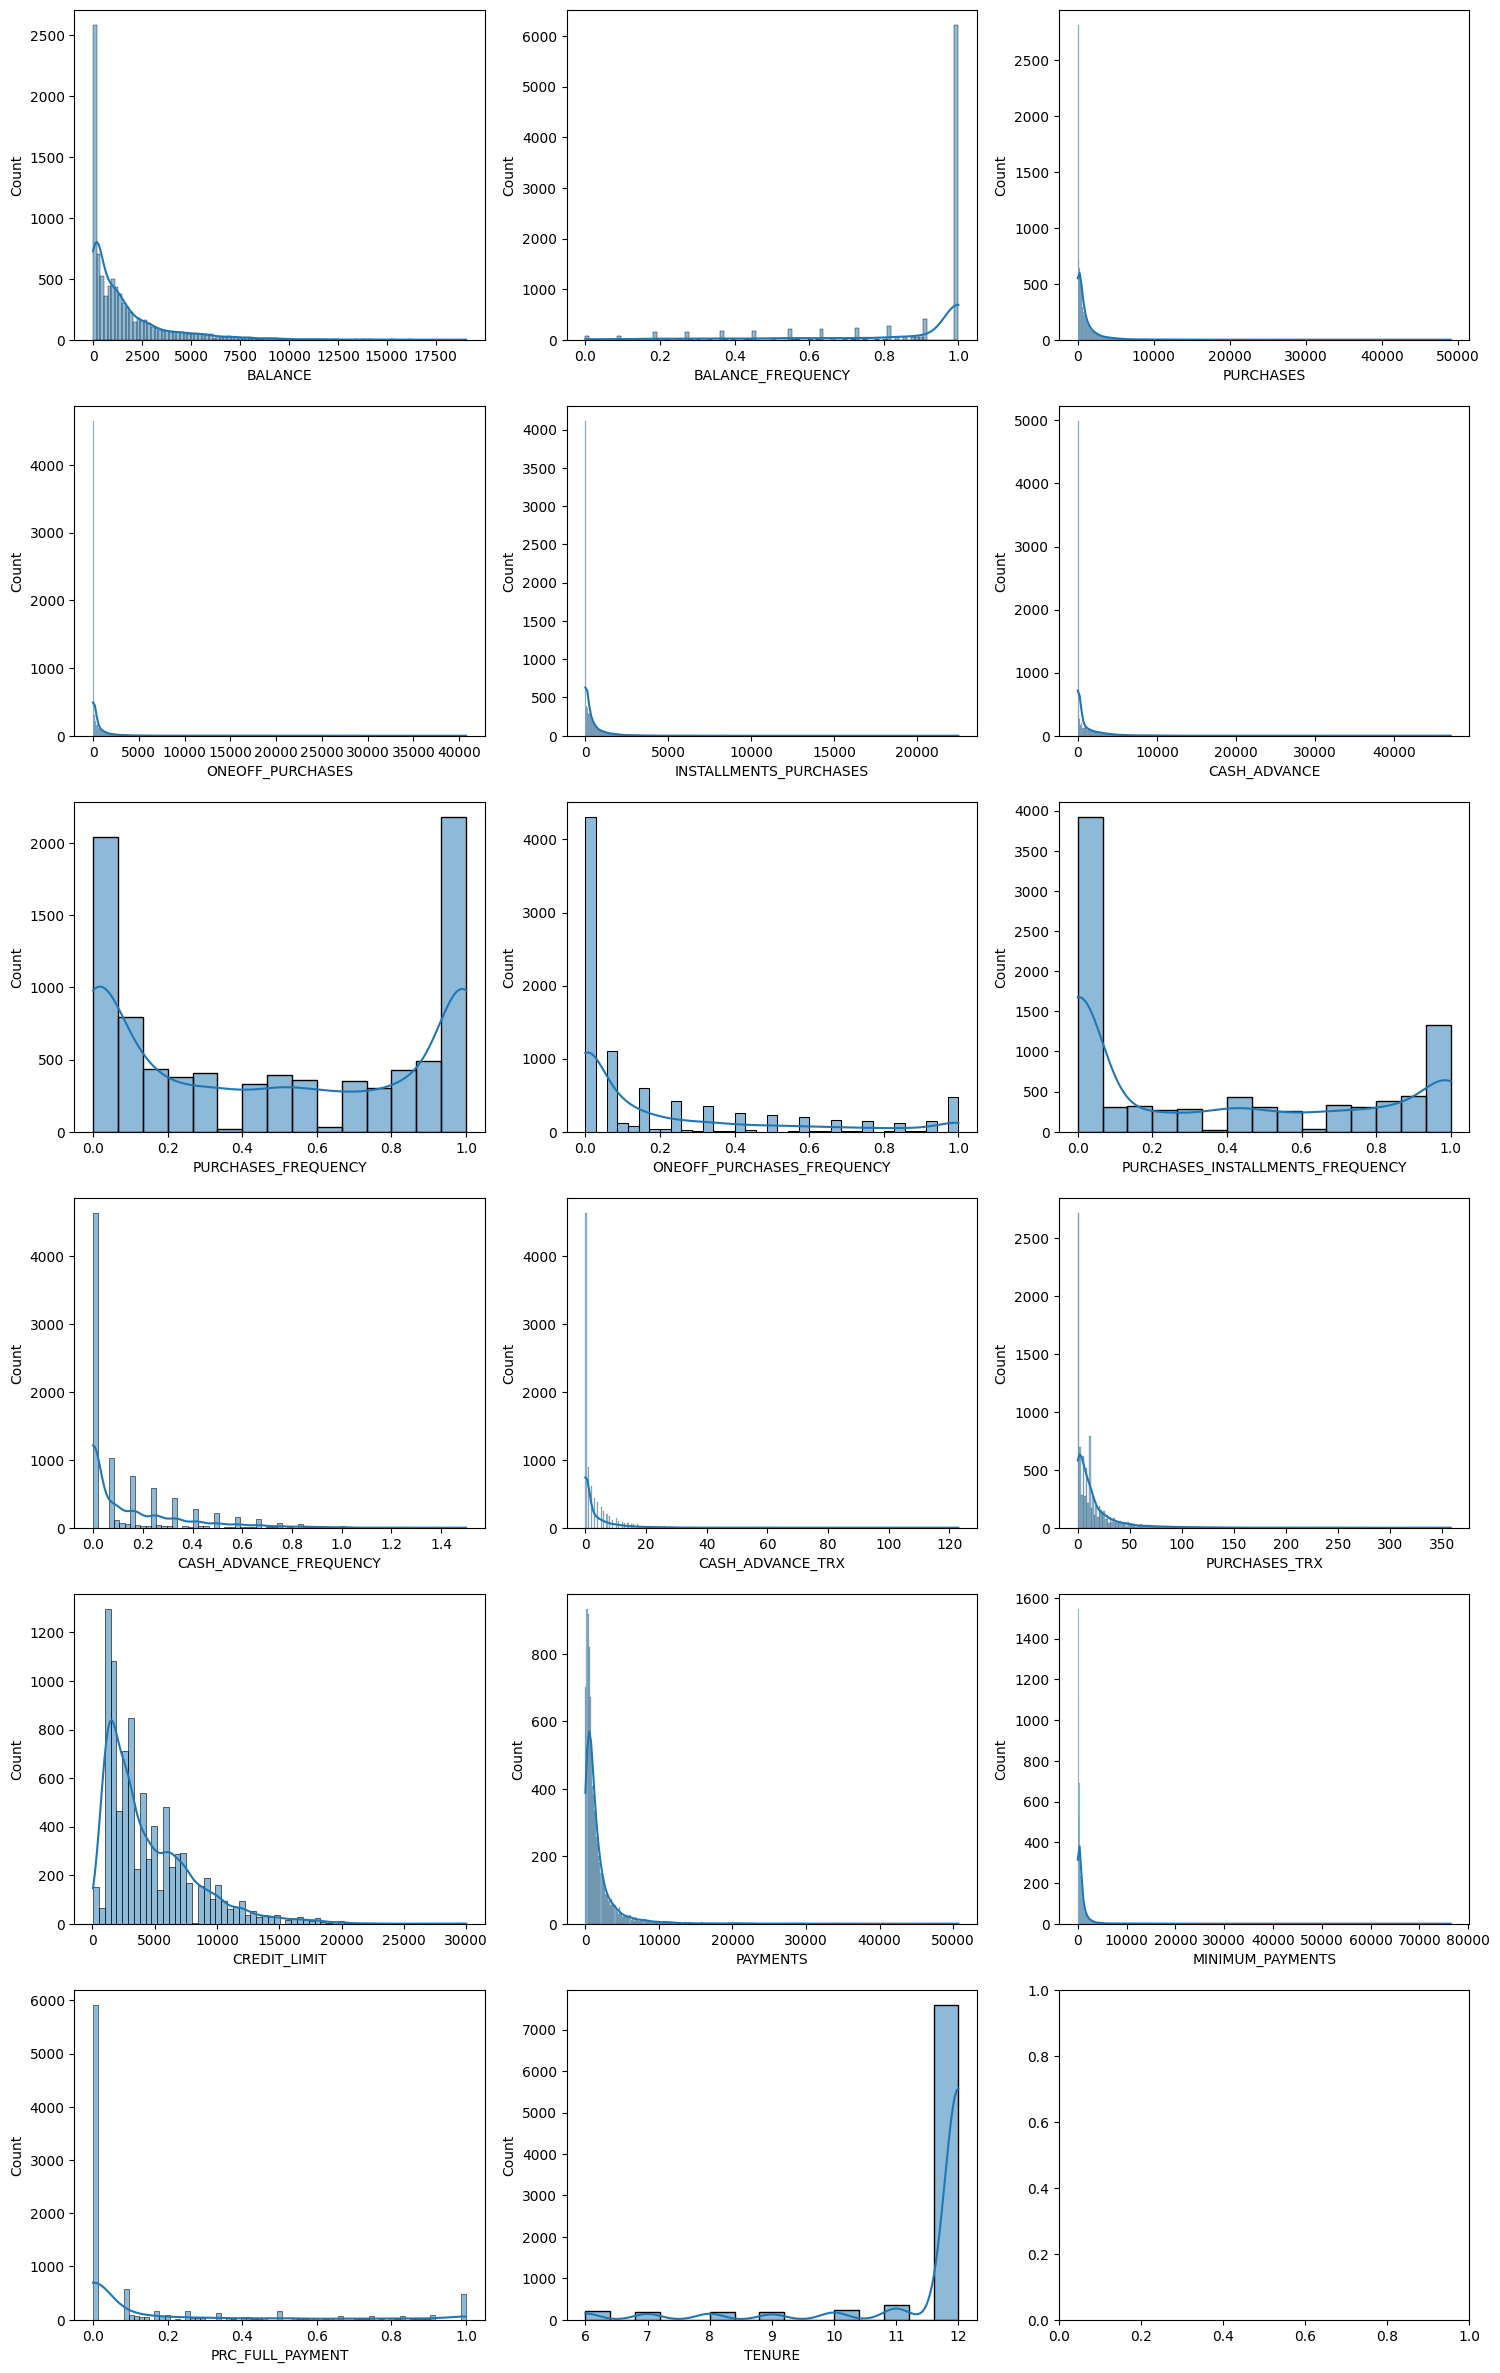

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df.columns)+1)/3), figsize=(18,5*round((len(df.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[index])

<h2><font face=verdona color=green> Log transformation</font></h2><b>
As the data is skewed I will use Log transformation on continous features to reduce the impact of outliers 

In [10]:
import numpy as np
df_log = df.apply(lambda x: np.log(x) if (x > 0).all() and np.abs(x.min()-x.max()) >10 else x)
df_log

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,6.907755,201.802084,4.938135,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,8.853665,4103.032597,6.977599,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,8.922658,622.066742,6.441401,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,8.922658,0.000000,5.744105,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,7.090077,678.334763,5.500406,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,6.907755,325.594462,3.889499,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,6.907755,275.861322,5.744105,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,6.907755,81.270775,4.411808,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,6.214608,52.549959,4.020978,0.250000,6


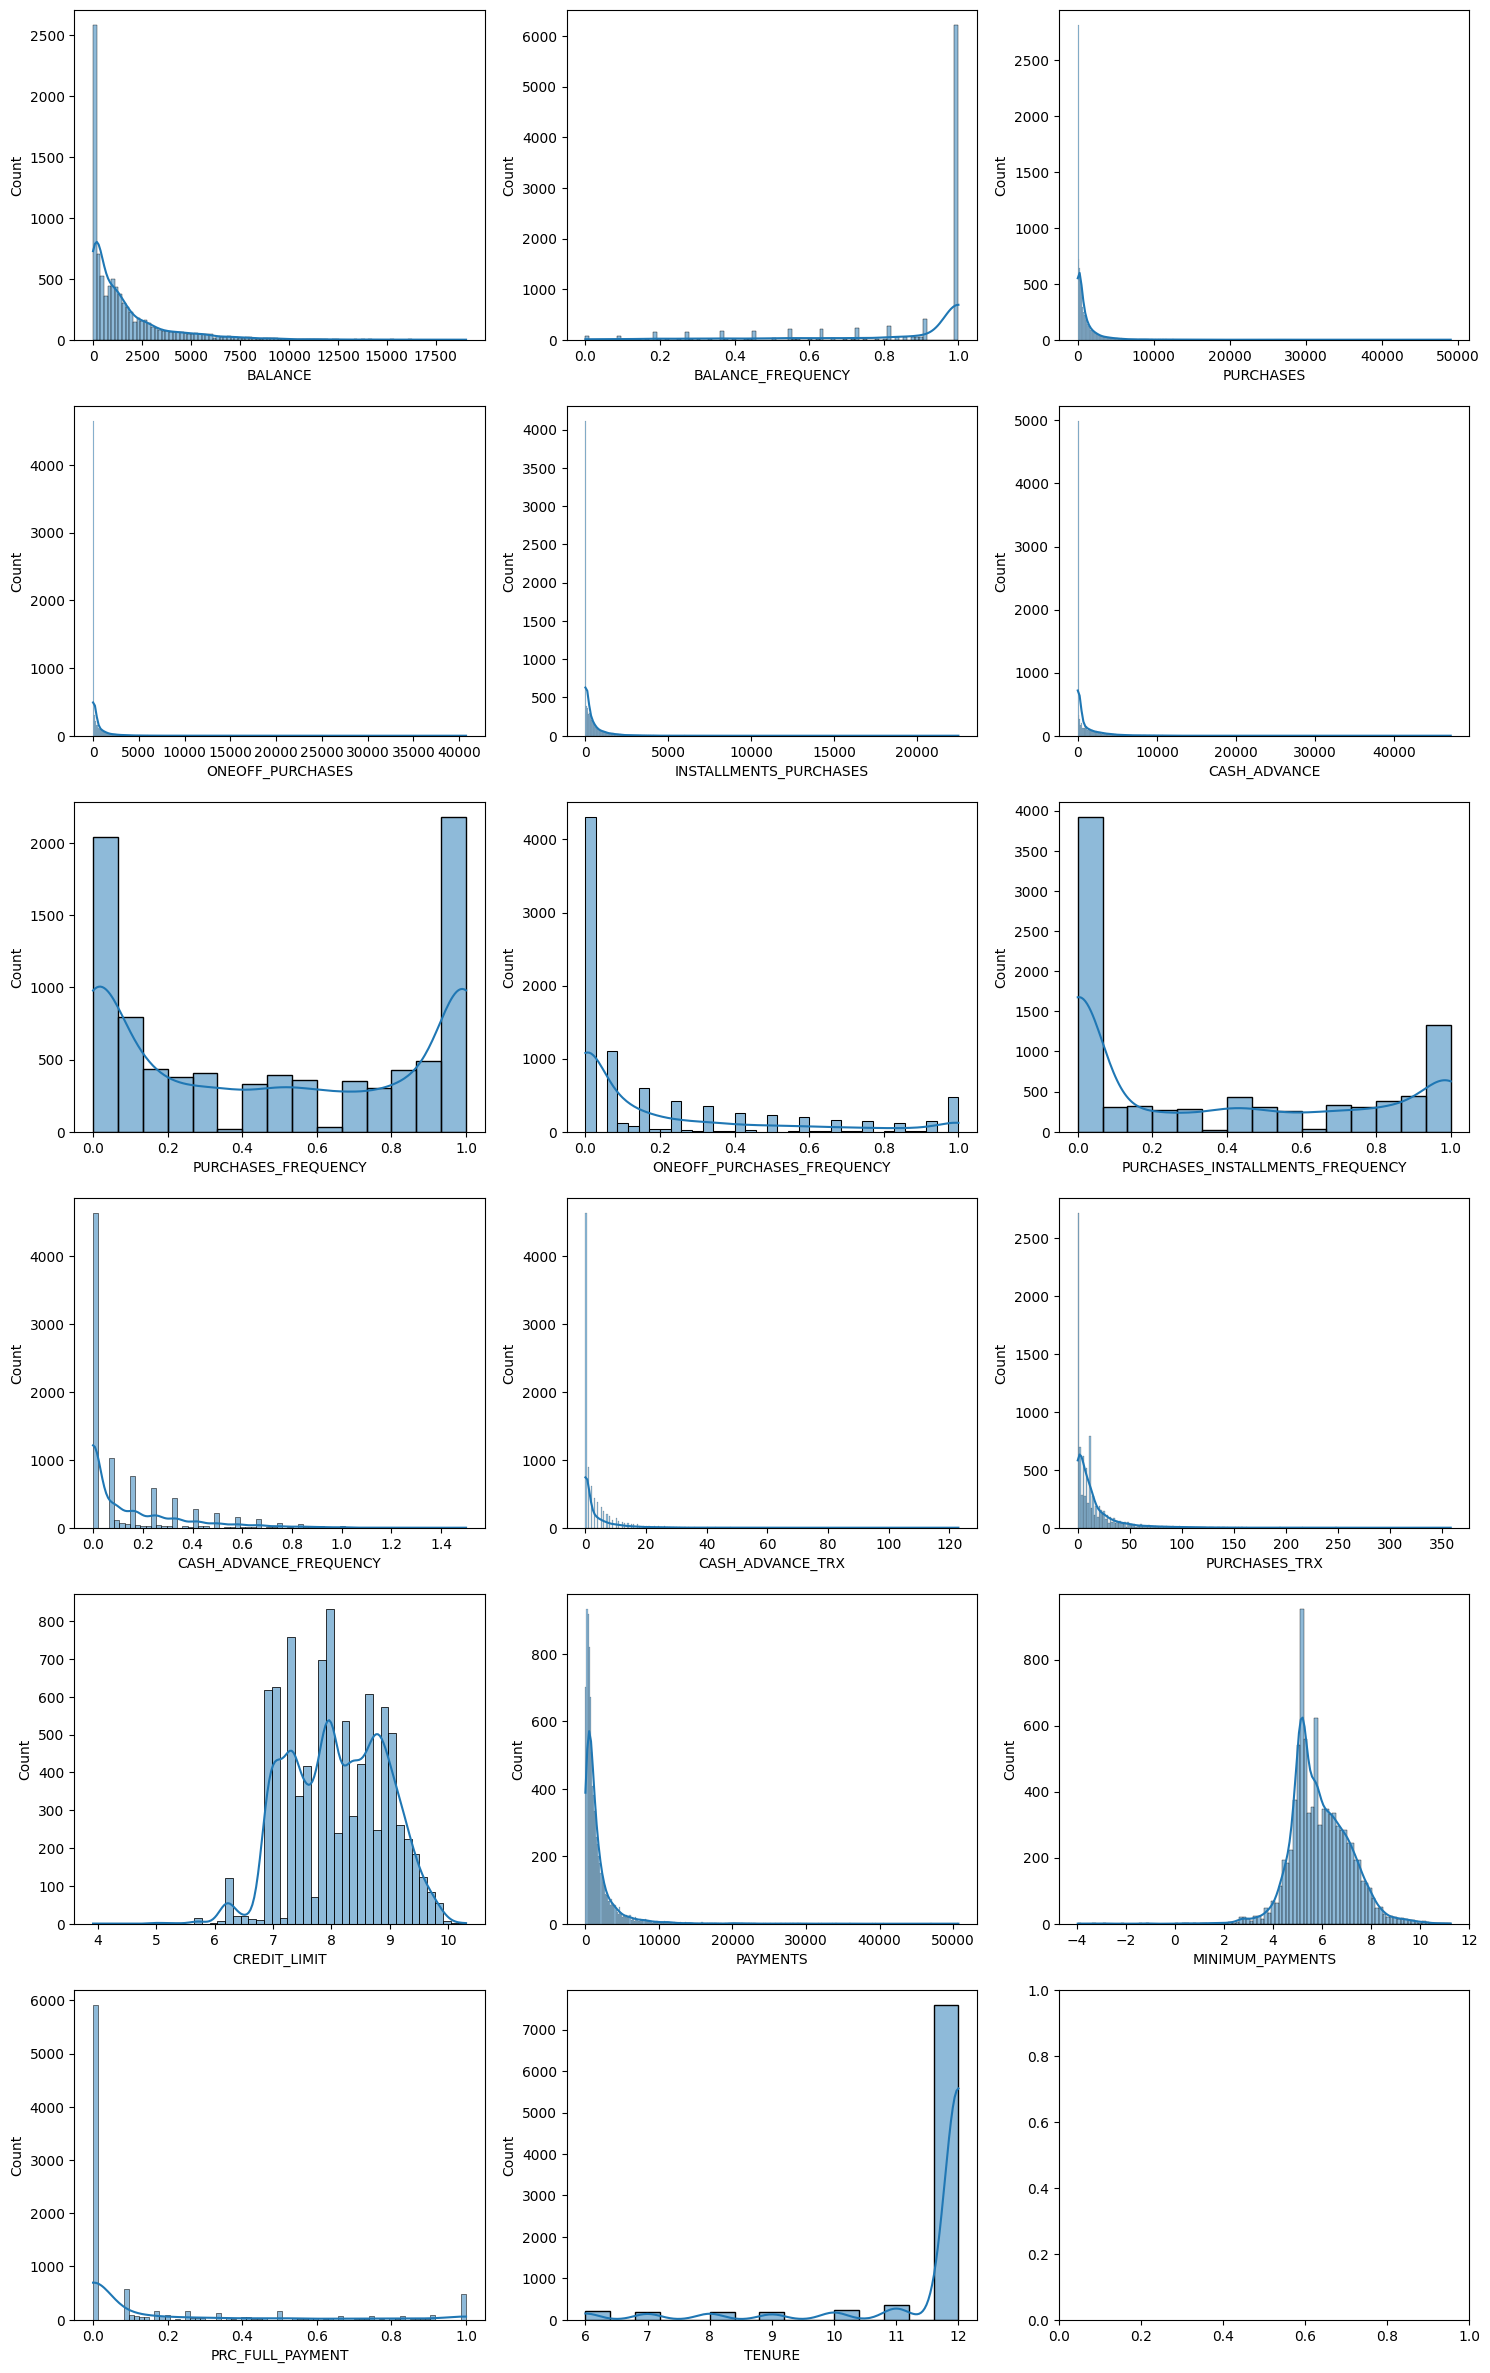

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df_log.columns)+1)/3), figsize=(18,5*round((len(df_log.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df_log.columns):
    sns.histplot(df_log[col], kde=True, ax=axes[index])

<b>The data yet seems to have quite a few outliers

<h2><font face=verdona color=green>Outlier Handling

In [12]:
from scipy.stats import normaltest
p_values = df_log.apply(lambda col: normaltest(col)[1])
gaussian_cols = np.array(p_values[p_values > 0.05].index)
non_gaussian_cols = np.array(p_values[p_values <= 0.05].index)
print("Gaussian Columns:", gaussian_cols)
print("Non-Gaussian Columns:", non_gaussian_cols)

Gaussian Columns: []
Non-Gaussian Columns: ['BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


<h3>I will use Percentile-Based Outlier Detection since Entire data is skewed

In [13]:
def Outlier_counter(data, col):
    upper_b = np.percentile(data[col], 99)
    lower_b = np.percentile(data[col], 1)
    outliers = len(data[(data[col] < lower_b) | (data[col] > upper_b)])
    return outliers

In [14]:
sum1 = 0
cont_feat = np.array([])
for col in df_log.columns:
    if (df_log[col].max() - df_log[col].min()) > 10 : #categorizing into continous columns
        cont_feat = np.append(cont_feat, col)
        ols = Outlier_counter(df_log, col)
        sum1 = sum1 + ols
        print(col, " : ",ols)
        
print('\nTotal Outliers:', sum1,'\nLength of Data - ', len(df_log))

BALANCE  :  180
PURCHASES  :  90
ONEOFF_PURCHASES  :  90
INSTALLMENTS_PURCHASES  :  90
CASH_ADVANCE  :  90
CASH_ADVANCE_TRX  :  89
PURCHASES_TRX  :  90
PAYMENTS  :  90
MINIMUM_PAYMENTS  :  180

Total Outliers: 989 
Length of Data -  8950


<h2><font face=verdona color=green>Capping</font></h2>
<b>as total Outliers holds significant number though is an approximate value<br>
<b>(some outliers may be in counted in more than a col as it may be outlying in multiple features)

In [15]:
def Outlier_capper(data, col):
    outliers = Outlier_counter(data, col)
    if outliers > 0:
        upper_b = np.percentile(data[col], 99)
        lower_b = np.percentile(data[col], 1)
        data[col] = np.where(data[col] < lower_b, lower_b,
                        np.where(data[col] > upper_b, upper_b, data[col]))
        return  data[col]

In [16]:
for i in cont_feat:
    df_log[i]= Outlier_capper(df_log, i)
print('Outliers successfully capped outliers')

Outliers successfully capped outliers


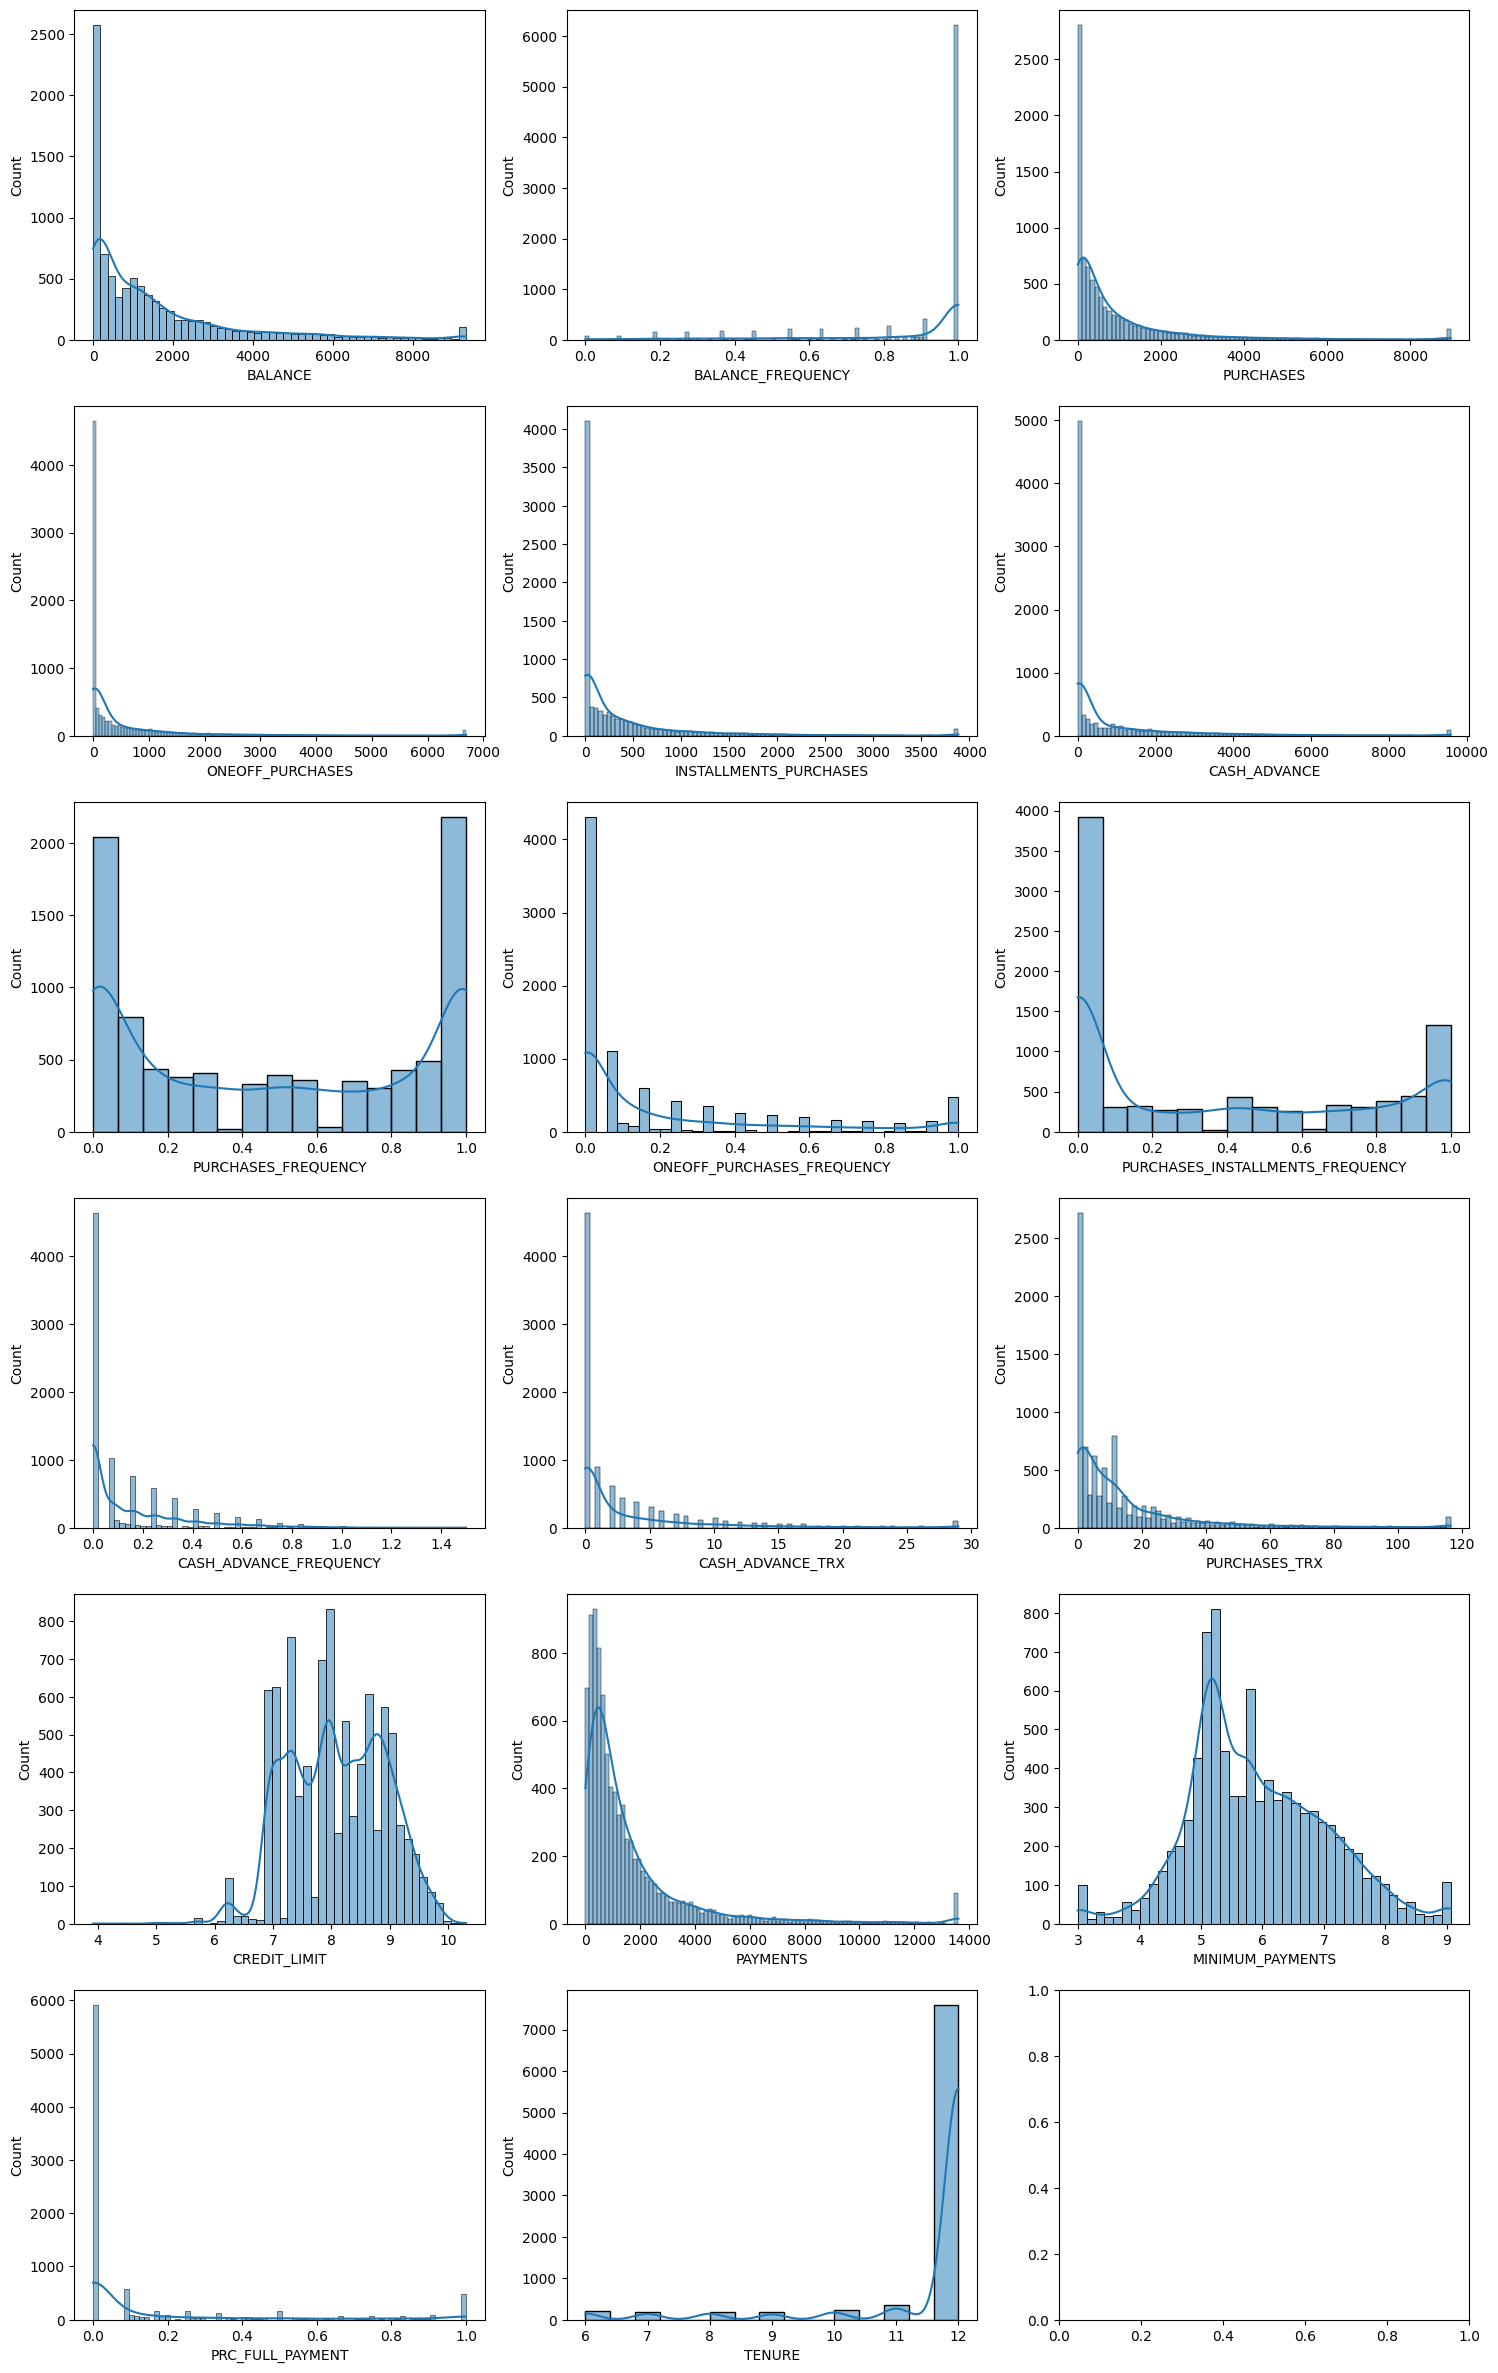

In [17]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df_log.columns)+1)/3), figsize=(18,5*round((len(df_log.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df_log.columns):
    sns.histplot(df_log[col], kde=True, ax=axes[index])

<h3>Now the data looks alright

In [18]:
print(df_log.shape)
df_log.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,6.907755,201.802084,4.938135,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,8.853665,4103.032597,6.977599,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,8.922658,622.066742,6.441401,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,8.922658,0.000000,5.744105,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,7.090077,678.334763,5.500406,0.000000,12


<h2><font face=verdona color=green>Dropping Constant Columns</font></h2>
<b>columns with more than 75% of same records

In [19]:
l=0
for i in cont_feat:
    if df_log[i].value_counts().iloc[0] > (75/100)*len(df_log):
        print('Column : ', i)
        print('Value : ',df_log[i].value_counts().index[0],'Occurance : ', df_log[i].value_counts().iloc[0])
    else:
        l+=1
        if l == len(cont_feat):
            print('No constant columns')

No constant columns


<h2><font face=verdona color=green>Dropping Columns causing Multi-collinearity</font></h2>

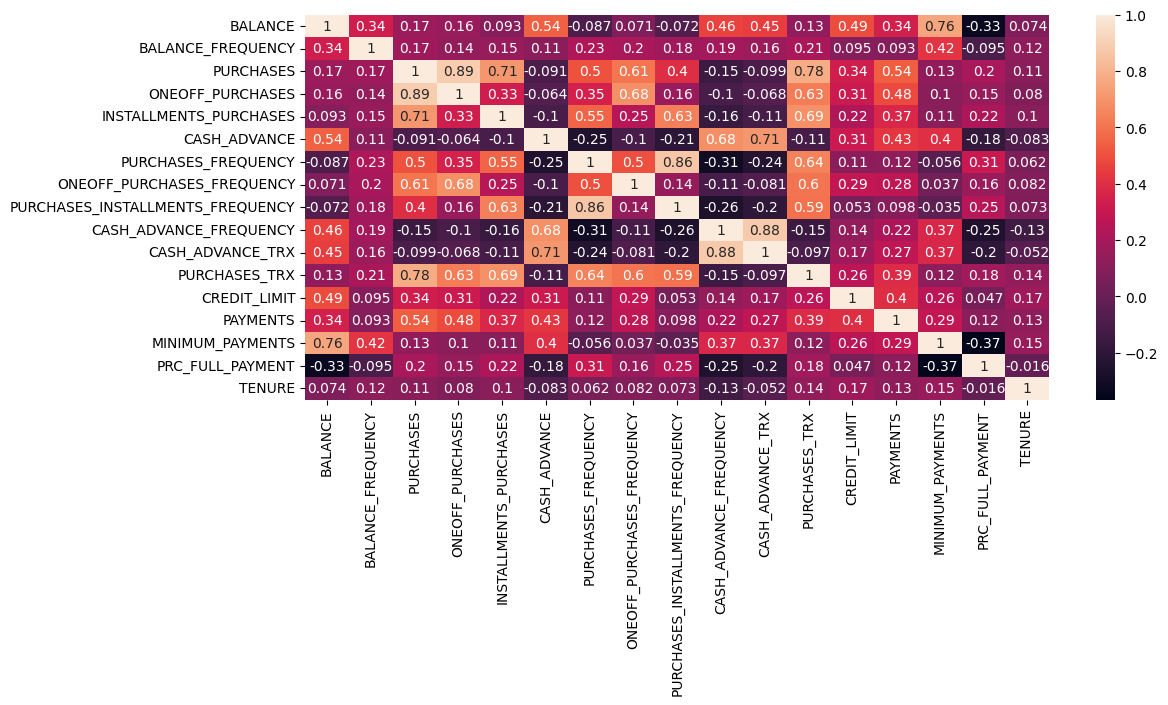

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(df_log.corr(), annot=True)
plt.show()

In [21]:
import pandas as pd

correlation_matrix = df_log.corr()

threshold = 0.75
highly_correlated_pairs = []

for i in range(len(df_log.columns)):
    for j in range(i + 1, len(df_log.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((df_log.columns[i], df_log.columns[j]))

new_s = set()
print("Pairs of columns with high correlation:")
for col1, col2 in highly_correlated_pairs:
    print(f"{col1} and {col2}: {correlation_matrix.loc[col1, col2]}")
    new_s.add(col1)
#     new_s.add(col2) 

Pairs of columns with high correlation:
BALANCE and MINIMUM_PAYMENTS: 0.7582958739488906
PURCHASES and ONEOFF_PURCHASES: 0.8857932041071959
PURCHASES and PURCHASES_TRX: 0.780817457302739
PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY: 0.8629336372699634
CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX: 0.8806013184995268


In [22]:
df_new = df_log.drop(columns=list(new_s))

<h2><font face=verdona color=green>Scaling and Reducing Dimensionality

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca = PCA(n_components=2)

In [24]:
df_ = scaler.fit_transform(df_new)
df_2 = pca.fit_transform(df_)
df_3 = pd.DataFrame(df_2)
df_3.head()

,0,1
0,-1.867291,-0.942817
1,-0.358200,2.968393
2,0.757357,0.128091
3,-0.781291,-0.078901
4,-1.565308,-0.441911


<h2><font face=verdona color=green>Using elbow method to determine the optimal number of clusters

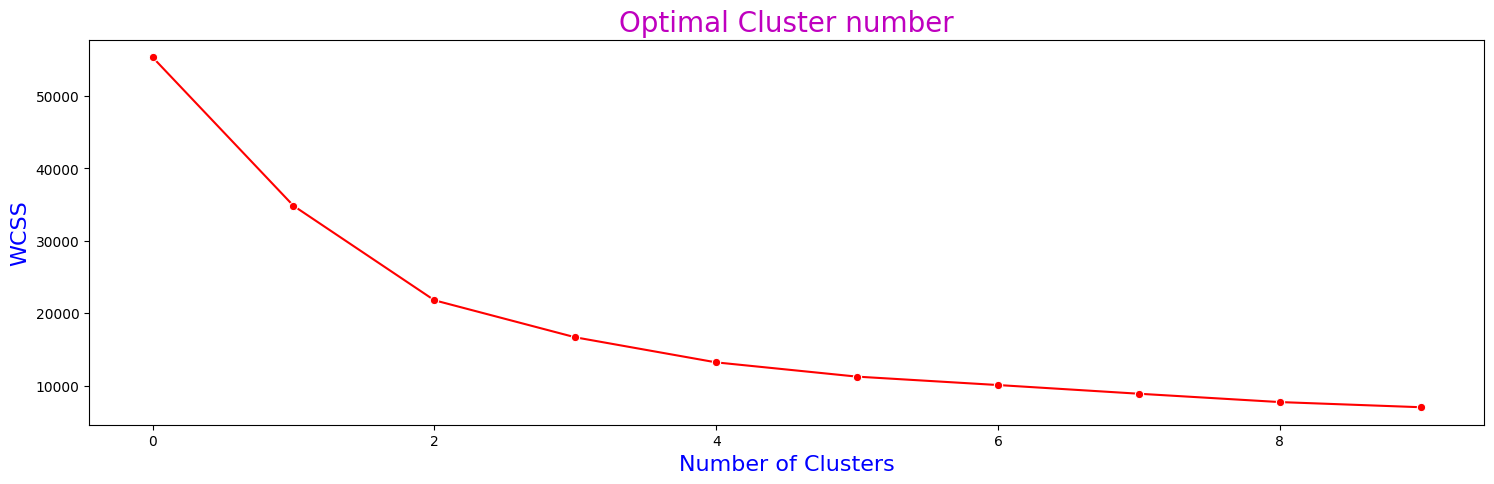

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=42, max_iter=100)
    kmeans.fit(df_2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(18,5))
plt.xlabel('Number of Clusters', fontsize=16, color='b')
plt.ylabel('WCSS', fontsize=16, color='b')
plt.title('Optimal Cluster number', fontsize=20, color='m')
sns.lineplot(wcss, marker='o', c='r')
plt.show()

In [26]:
wcss

[55351.298153297204,
 34847.73209501698,
 21810.20636516528,
 16697.777588108285,
 13237.710581688527,
 11270.598269748541,
 10110.932211116906,
 8911.053351218015,
 7760.236745449479,
 7049.637064453662]

<b>As visually its difficult to select the number of clusters to be formed, From wcss values I can determine from the 4th cluster onwards the decline in wcss is minimal thus cluster value can be set to 4

<h2><font face=verdona color=green> Cluster Model Building (1)

In [27]:
kmeans = KMeans(n_clusters=4, n_init='auto',init='k-means++', random_state=42, max_iter=100)
y_kmeans = kmeans.fit_predict(df_2)

In [28]:
df_log['KMC_clusters'] = y_kmeans
df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMC_clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,6.907755,201.802084,4.938135,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,8.853665,4103.032597,6.977599,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,8.922658,622.066742,6.441401,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,8.922658,0.000000,5.744105,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,7.090077,678.334763,5.500406,0.000000,12,2


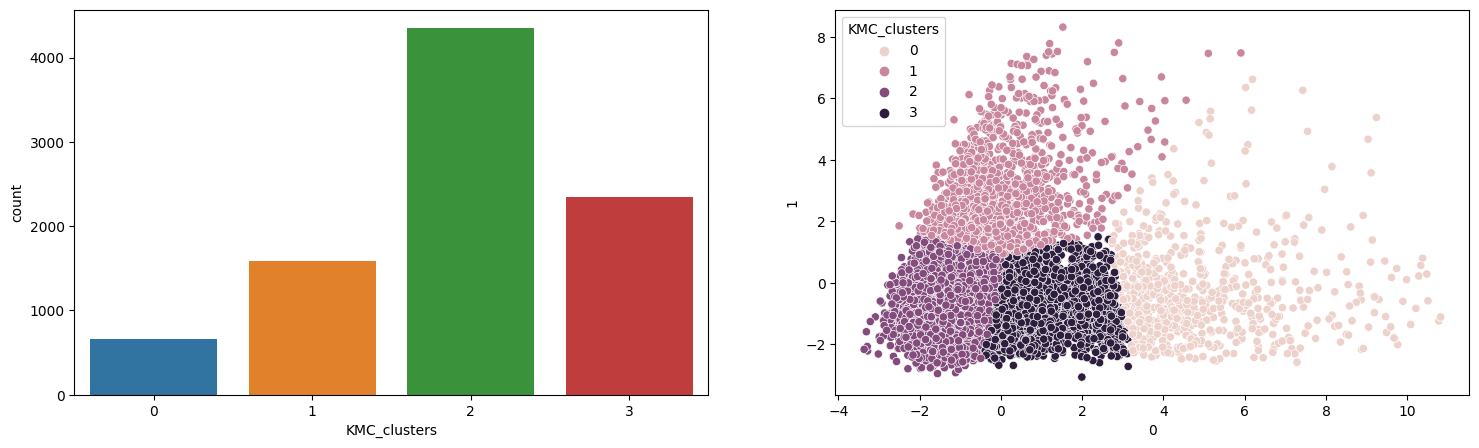

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
axes = ax.flatten()
sns.countplot(x=df_log['KMC_clusters'], ax=ax[0])
sns.scatterplot(x=df_3[0], y=df_3[1], hue=df_log['KMC_clusters'], ax=ax[1])
plt.show()

<h2><font face=verdona color=green>Silhouette score (1)</font></h2>
<b>to measure how well the data points can be differenciated from other clusters as well as how they can be categorized in their own cluster

In [30]:
from sklearn.metrics import silhouette_score
silhouette_score(df_3, y_kmeans)

0.38416705351349156

<h2><font face=verdona color=green>Dendogram(Heirarchial Clustering) </font></h2>
<b>to get the optimal number of clusters

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca = PCA(n_components=4)

df_ = scaler.fit_transform(df_new)
df_2 = pca.fit_transform(df_)
df_3 = pd.DataFrame(df_2)
df_3.head()

,0,1,2,3
0,-1.867291,-0.942812,-0.352799,-0.479308
1,-0.358201,2.968414,0.812256,0.731973
2,0.757357,0.128081,0.396431,-2.619022
3,-0.781291,-0.078895,0.849395,-1.164407
4,-1.565308,-0.441908,-0.629643,-0.915591


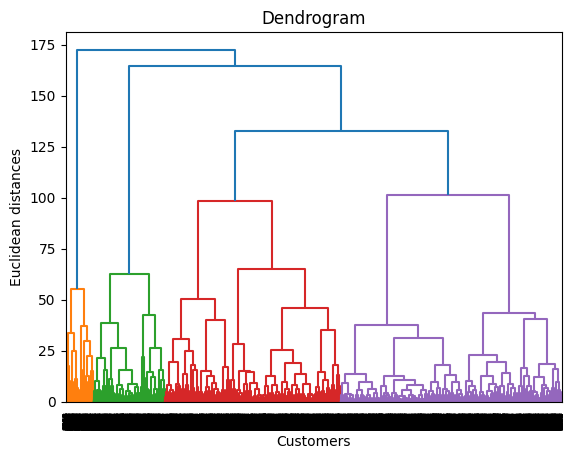

In [32]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(df_2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<h2><font face=verdona color=green>Cluster Model Building (2)

In [33]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agc = agc.fit_predict(df_2)

In [34]:
df_log['Agc_clusters'] = y_agc
df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMC_clusters,Agc_clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,6.907755,201.802084,4.938135,0.000000,12,2,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,8.853665,4103.032597,6.977599,0.222222,12,1,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,8.922658,622.066742,6.441401,0.000000,12,3,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,8.922658,0.000000,5.744105,0.000000,12,2,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,7.090077,678.334763,5.500406,0.000000,12,2,0


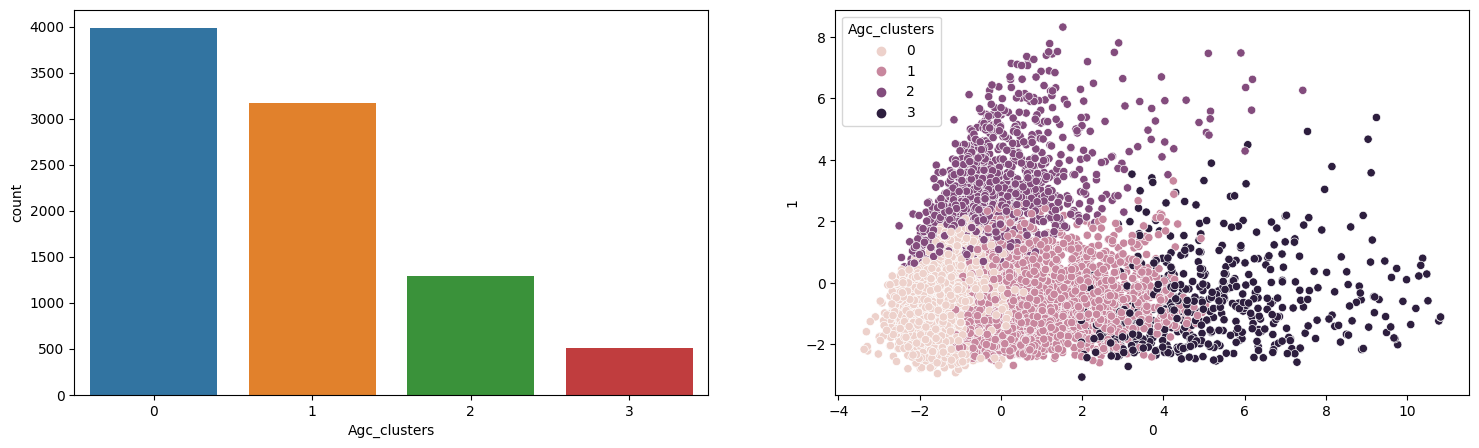

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
axes = ax.flatten()
sns.countplot(x=df_log['Agc_clusters'], ax=ax[0])
sns.scatterplot(x=df_3[0], y=df_3[1], hue=df_log['Agc_clusters'], ax=ax[1])
plt.show()

<h2><font face=verdona color=green>Silhouette score (2)</font></h2>
<b>Silhouette score closer to 1 indicates clusters are far away from each other and easily seperaple but in real world problems
    its never like that, as seen here the points are close to each other

In [36]:
silhouette_score(df_2, y_agc)

0.2296528485878434

<h2><font face=verdona color=green>Comparing Clusters of both the Models

<Axes: xlabel='Agc_clusters', ylabel='count'>

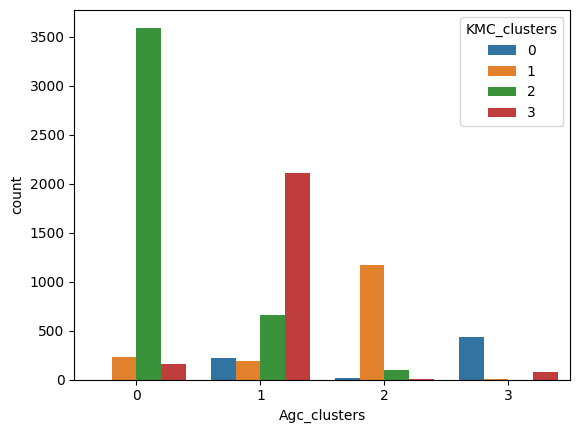

In [37]:
sns.countplot(x=df_log['Agc_clusters'], hue=df_log['KMC_clusters'])

<h2><font face=verdona color=green>As can be seen the clusters of both the Algorithms categorize the datapoints into almost same
clusters</font></h2><b>(cluster number is not the same but the each cluster of Agc_clusters represent each cluster of KMC_clusters)

<h2><font face=verdona color=green>Now I can visualize are the features' range that differenciate between clusters

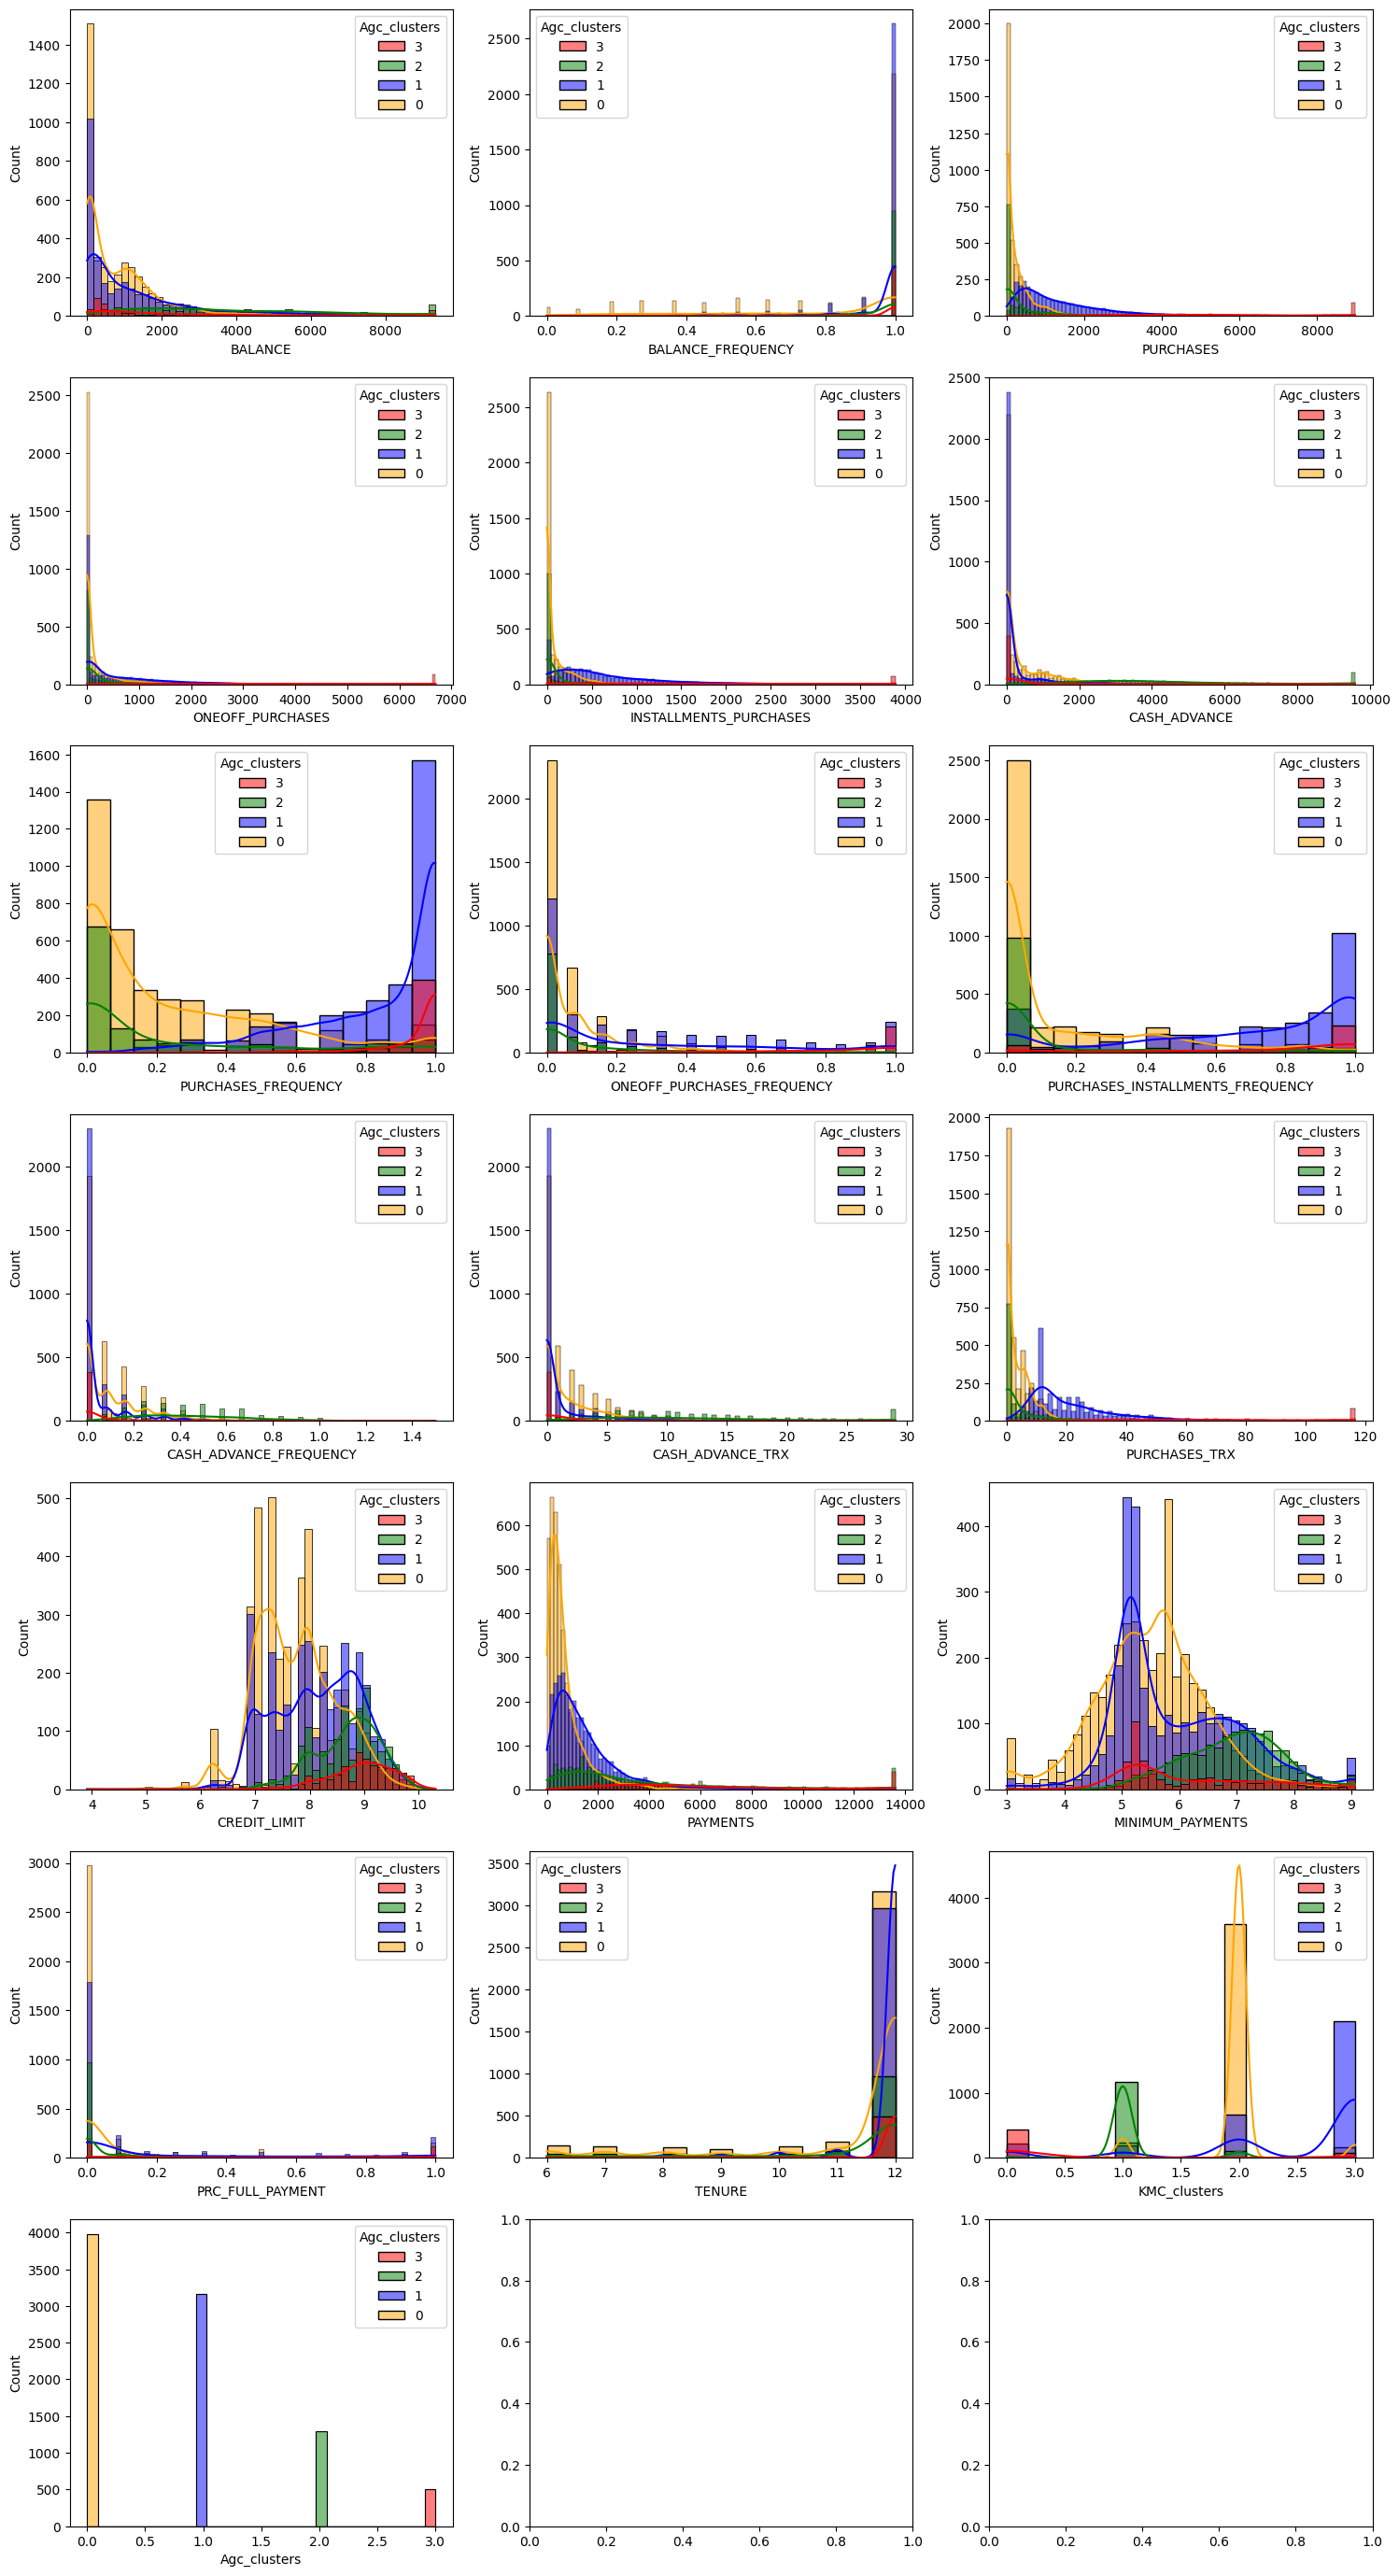

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df_log.columns)+1)/3), figsize=(18,5*round((len(df_log.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df_log.columns):
    sns.histplot(x=df_log[col], hue=df_log['Agc_clusters'], kde=True, ax=axes[index],
                 hue_order=[3,2,1,0],palette=['r', 'g', 'b', 'orange'])

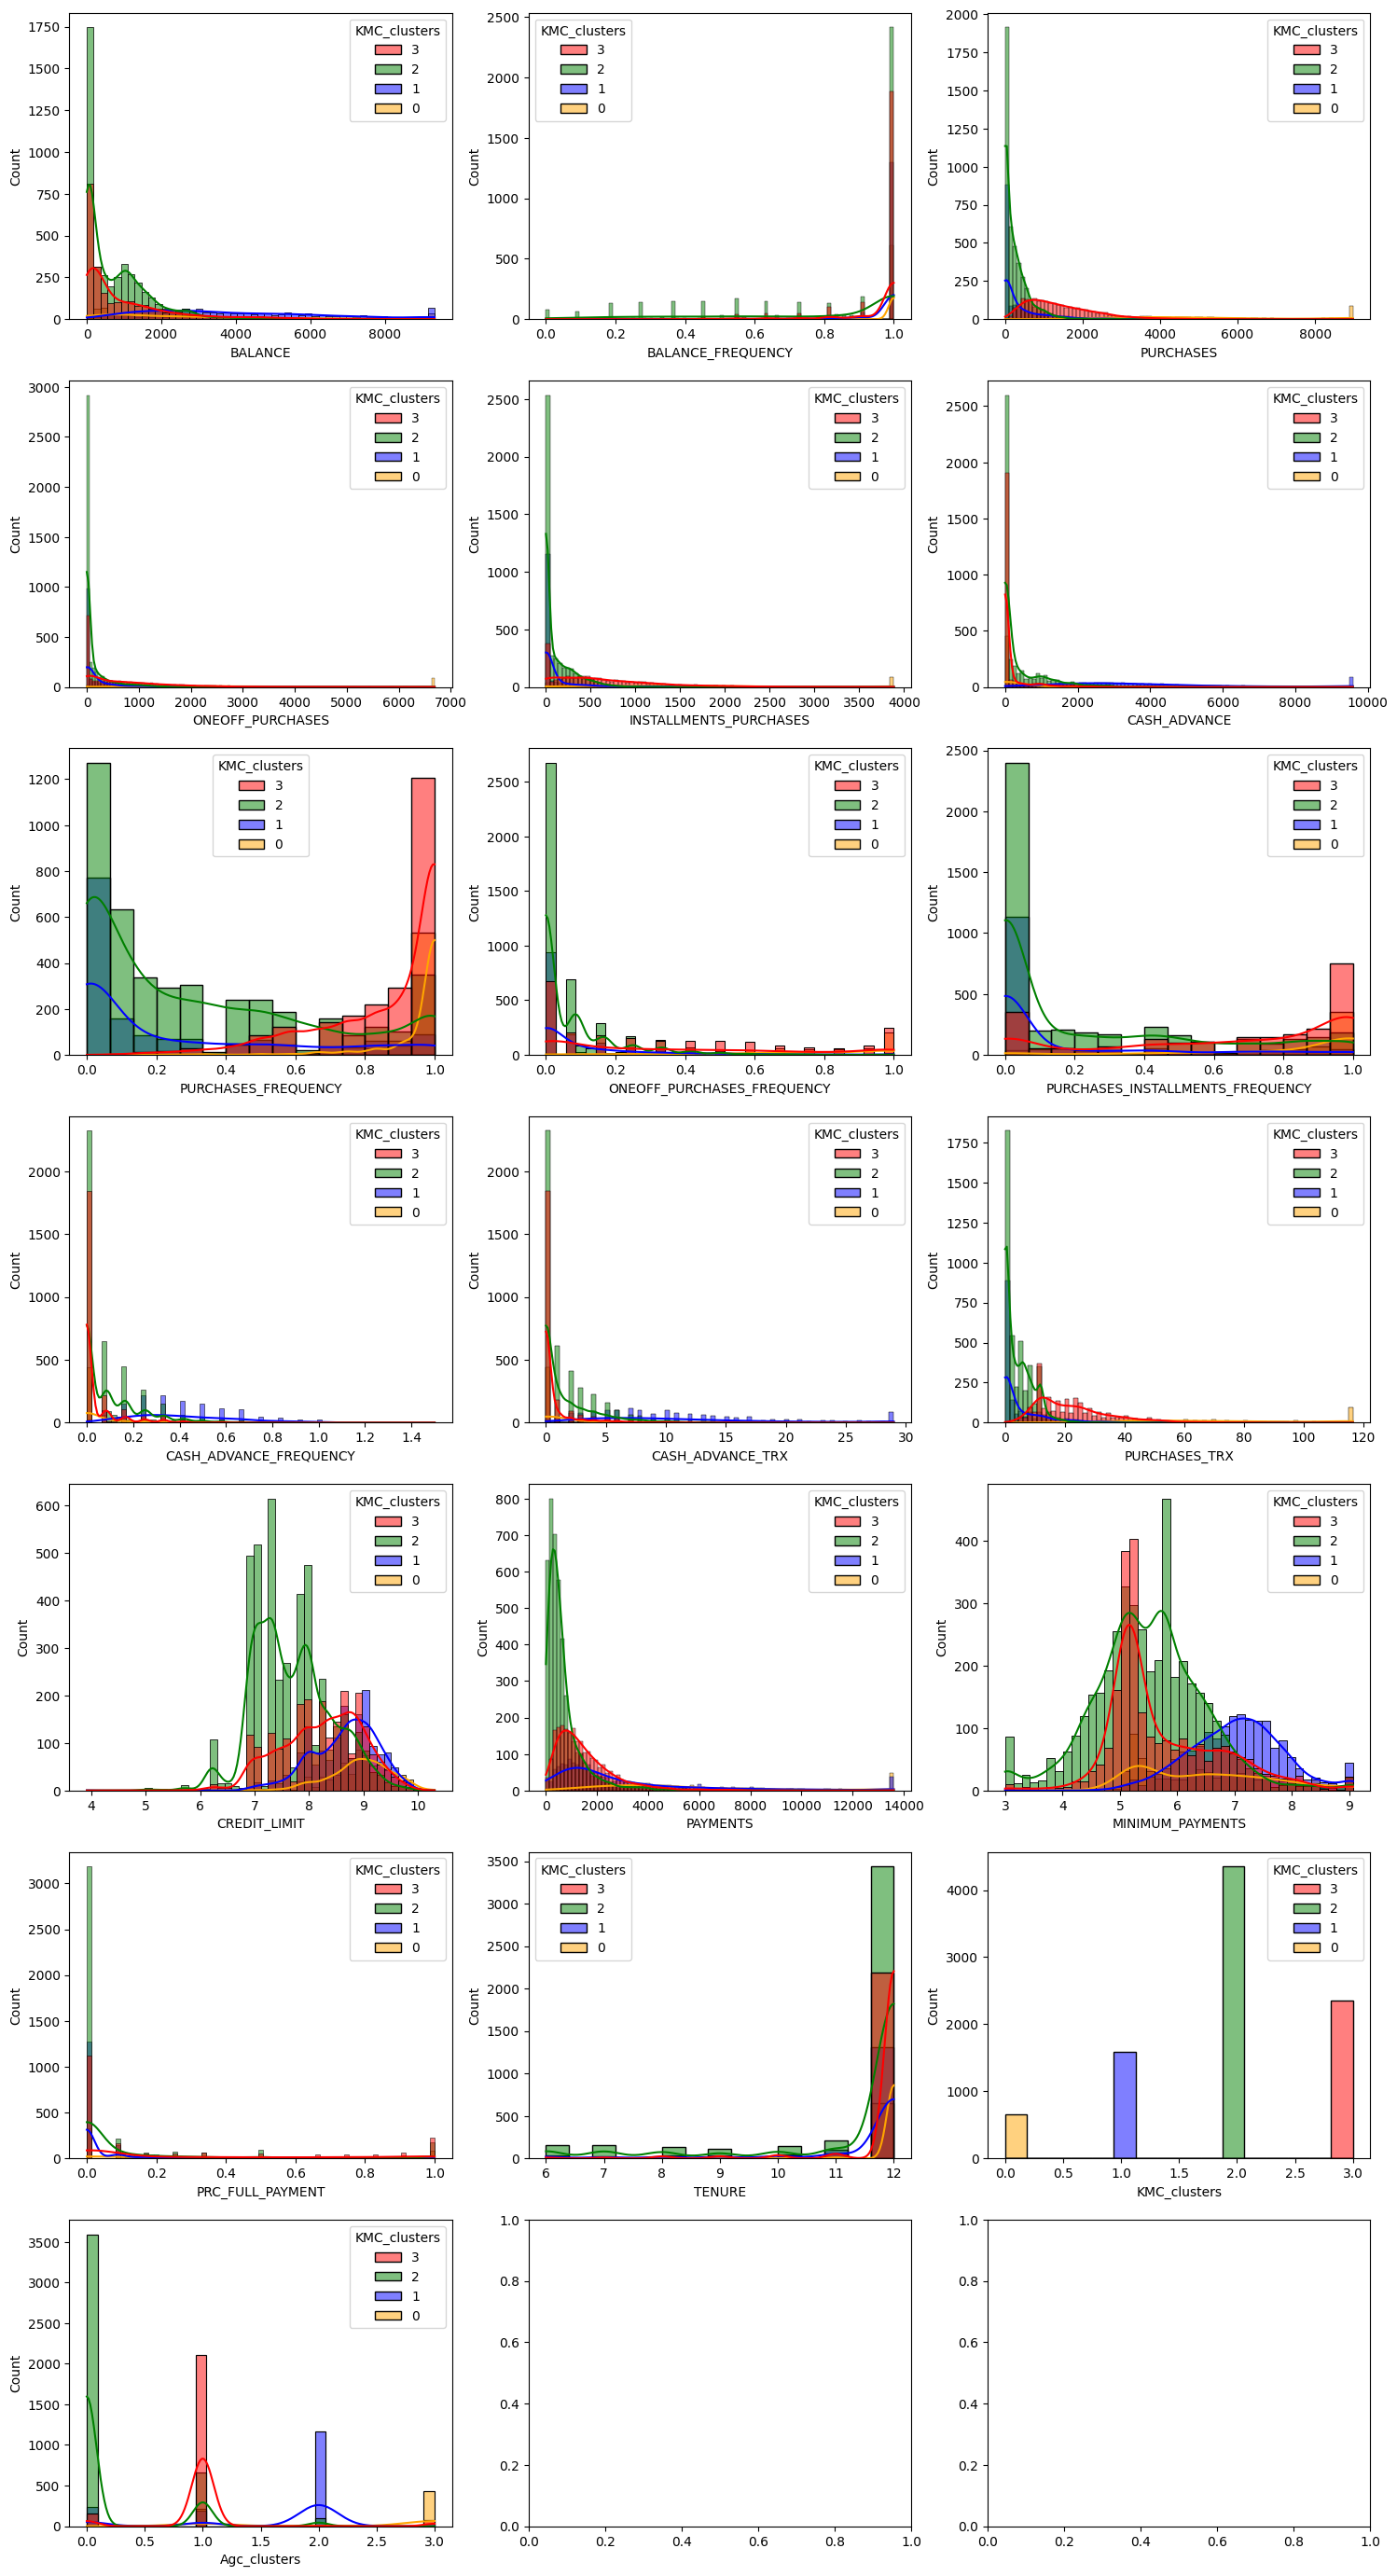

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=round((len(df_log.columns)+1)/3), figsize=(18,5*round((len(df_log.columns)+1)/3)))
axes = ax.flatten()

for index, col in enumerate(df_log.columns):
    sns.histplot(x=df_log[col], hue=df_log['KMC_clusters'], kde=True, ax=axes[index],
                 hue_order=[3,2,1,0],palette=['r', 'g', 'b', 'orange'])

<h3><font color=red 
          face=verdona><center>Since KMC_clusters have a better silhoutte score and Also majorly the cluster are the same,<br>
I will consider KMC_clusters as the target feature generated by KMeans

In [40]:
df_log.drop(columns=['Agc_clusters'], inplace=True)

<h4>Seperating different clusters data to understand the data better


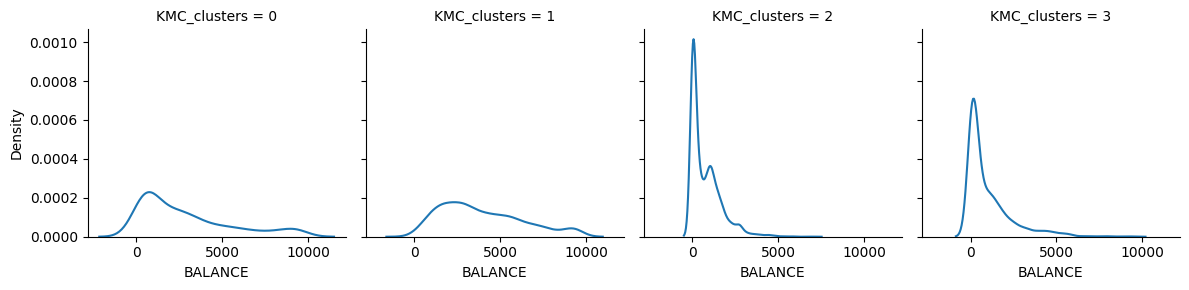

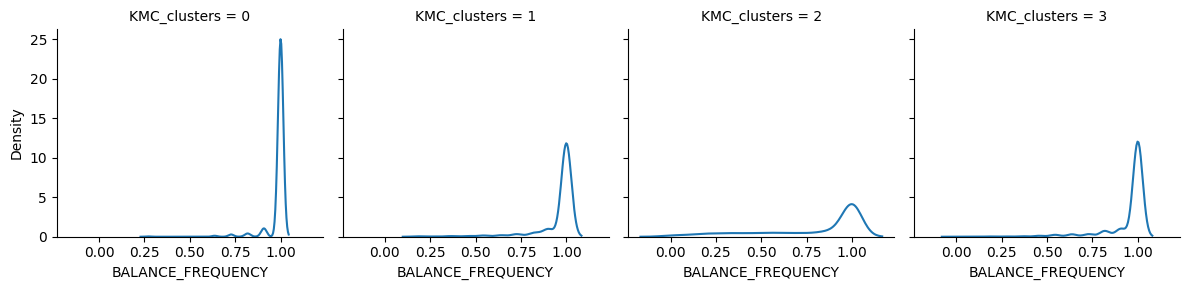

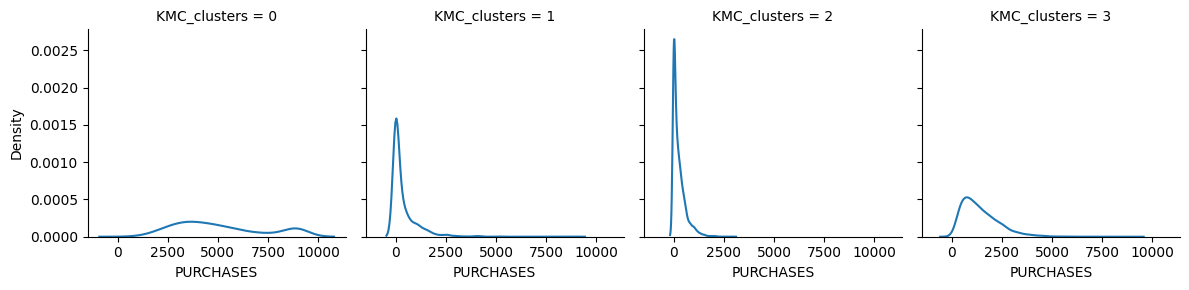

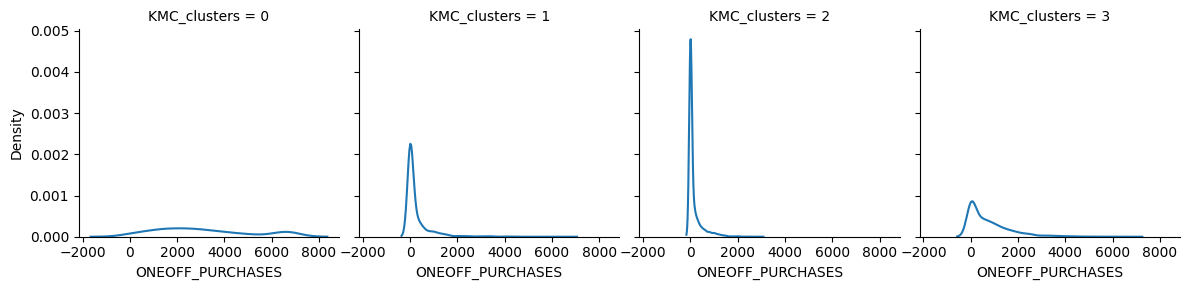

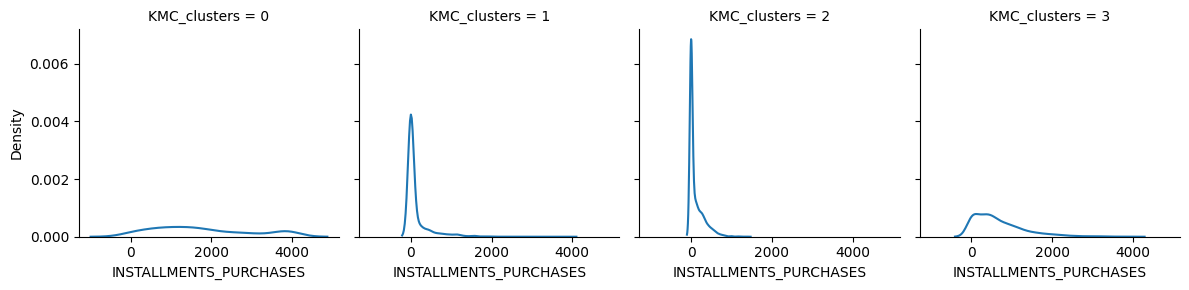

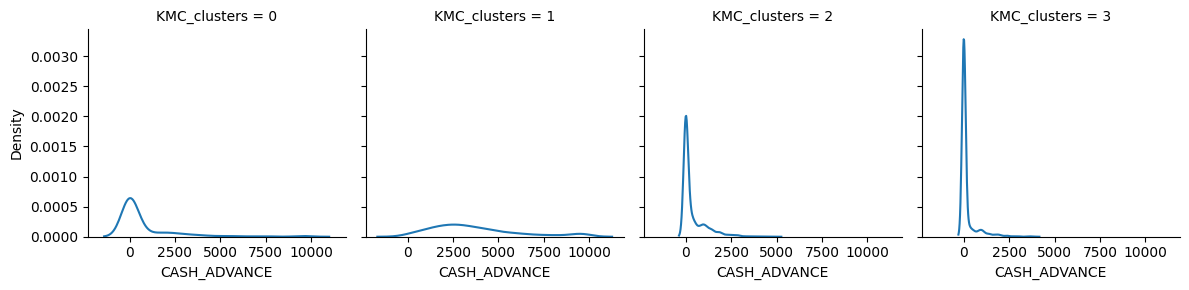

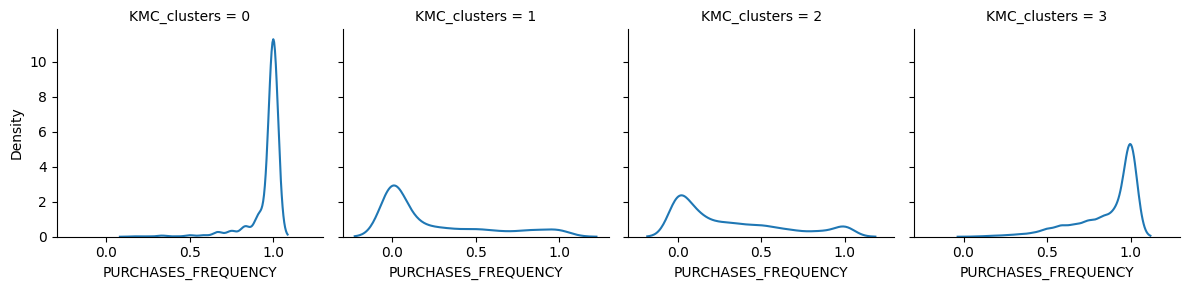

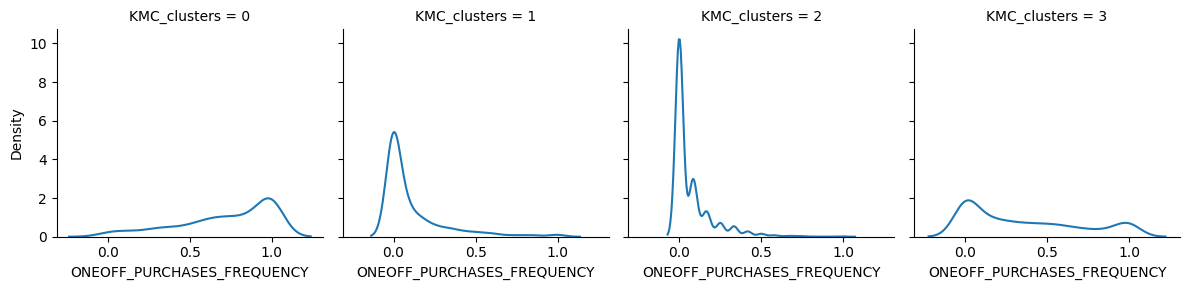

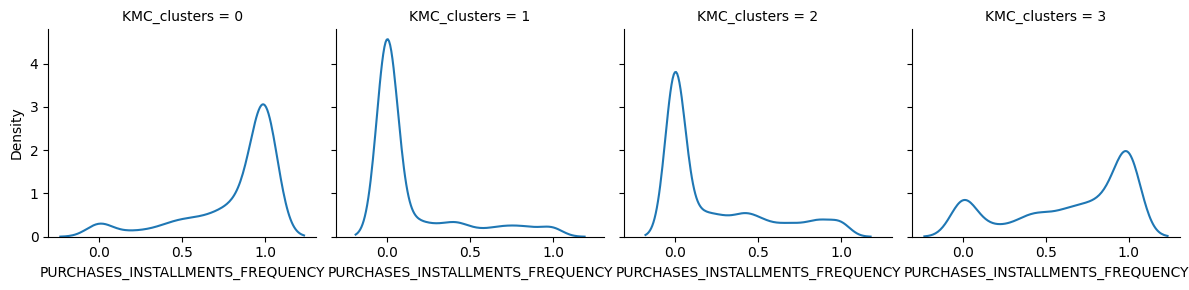

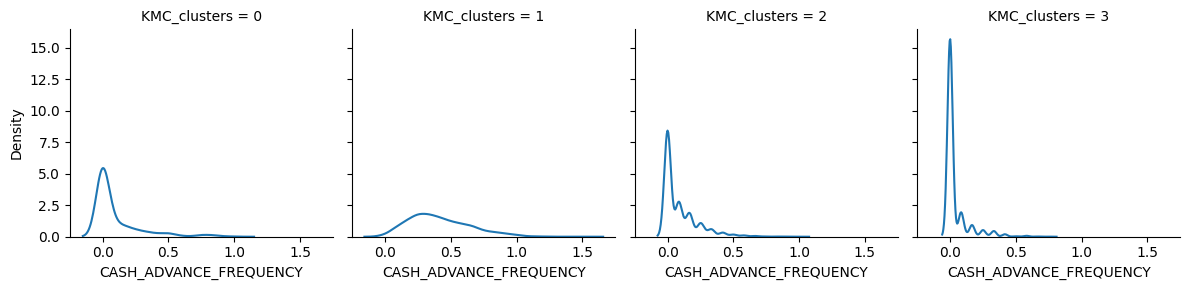

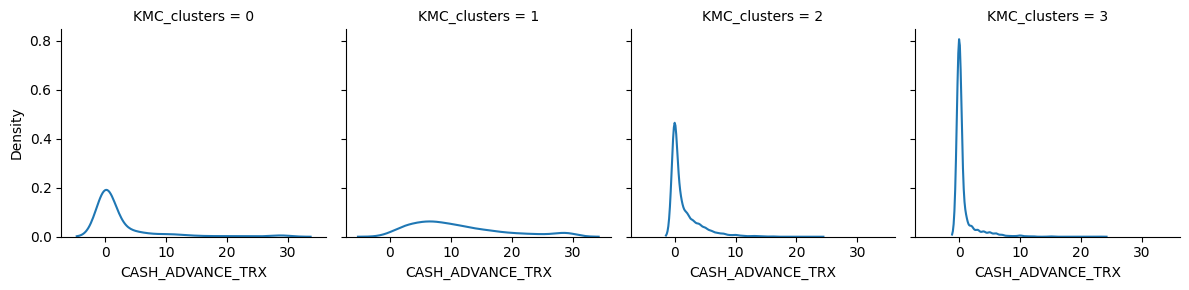

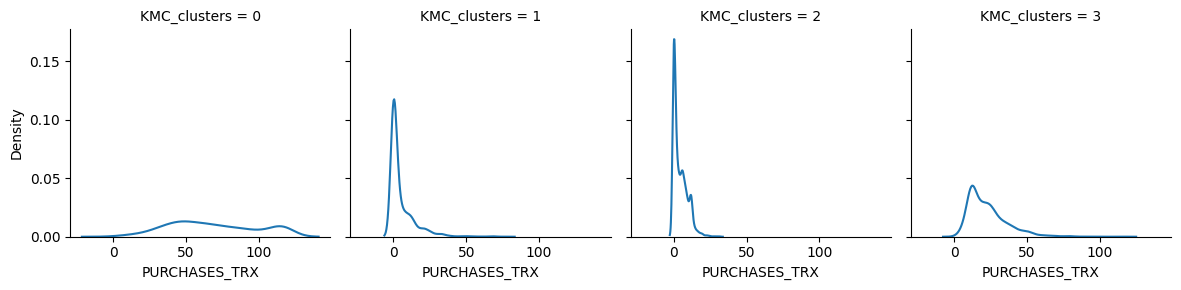

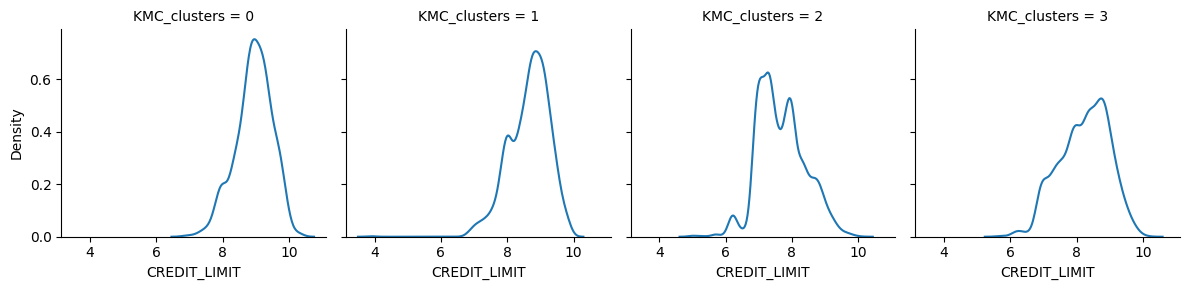

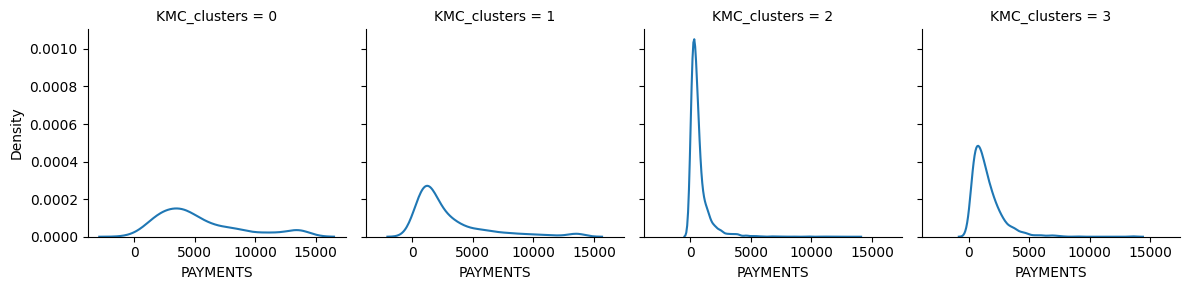

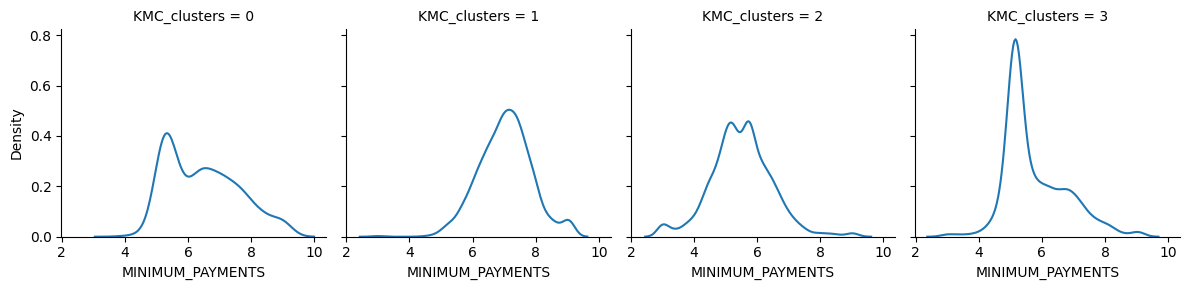

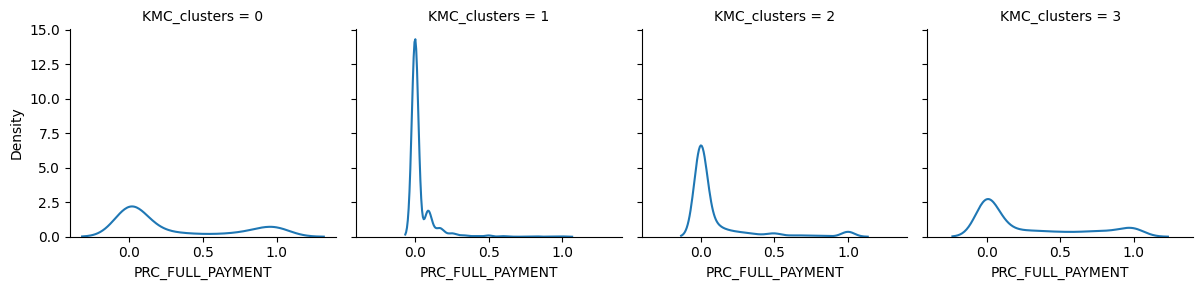

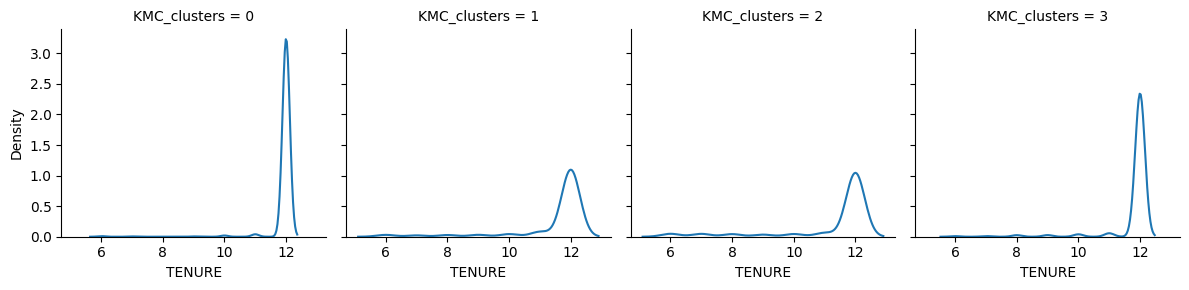

In [41]:
for c in df_log.drop(['KMC_clusters'],axis=1):
    grid= sns.FacetGrid(df_log, col='KMC_clusters')
    grid= grid.map(sns.kdeplot, c)
plt.show()

<h3><center><font face=verdona color=brown>Based on the characteristics above I can differenciate the customers into a cluster,<br> Now I will need to build a Multi-class Classification model which will be used for predicting cluster of New customers.

<b><pre><center>The data is already preprocessed thus I will now build the model 

<center><font color=magenta face=georgia><h1>🔀Train Test Split<br>
🛠️Building Classification Model<br>
🏋️‍♂️Training the Model<br>
🎯Evauluating the Model<br>

In [42]:
X = df_new.values
y = df_log['KMC_clusters'].values

In [43]:
import warnings
warnings.filterwarnings('ignore')

from colorama import Fore
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()


# tried all of these models and kept only the best ones
l_reg = LogisticRegression()
gb = GradientBoostingClassifier()
rforest = RandomForestClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
dtree = DecisionTreeClassifier()
svc = SVC(kernel='linear')
ada = AdaBoostClassifier(base_estimator=dtree)

kfold = KFold(n_splits=5, shuffle=True, random_state=32)
models = [l_reg, svc]  
model_names = ['Logistric Regression', 'SVC']  
best_indices_dict = {}

for i, model in enumerate(models):
    model_name = model_names[i]
    best_accuracy = 0.0
    print('---------------------------', model_name, '------------------------------')
    mean_val_acc, mean_test_acc = [], []

    for train_indices, test_indices in kfold.split(X):
        X_train, X_val, y_train, y_val = train_test_split(X[train_indices], y[train_indices], test_size=0.2, random_state=42)
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        model.fit(X_train, y_train)

        y_val_pred = model.predict(X_val)

        val_accuracy = round(accuracy_score(y_val, y_val_pred), 4)
        mean_val_acc.append(val_accuracy)

        X_test, y_test = X[test_indices], y[test_indices]
        X_test = scaler.transform(X_test)
        y_test_pred = model.predict(X_test)
        test_accuracy = round(accuracy_score(y_test, y_test_pred), 4)
        mean_test_acc.append(test_accuracy)

        if val_accuracy > test_accuracy:
            print(f'{Fore.GREEN}Validation Accuracy : ', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.RED}Test Accuracy : ', round(test_accuracy, 4), f"{Fore.RESET}")
        else:
            print(f'{Fore.RED}Validation Accuracy :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.GREEN}Test Accuracy : ', round(test_accuracy, 4), f"{Fore.RESET}")
            
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_indices_dict[model_name] = {
                'train': train_indices,
                'test': test_indices,
                'test_true': y_test,
                'test_preds': y_test_pred
            }

    print('Mean Val Accuracy : ', round(np.mean(mean_val_acc), 4), 'Mean Test Accuracy : ', round(np.mean(mean_test_acc), 4))

--------------------------- Logistric Regression ------------------------------
Validation Accuracy :  0.9909	Test Accuracy :  0.9905 
Validation Accuracy :  0.9874	Test Accuracy :  0.9866 
Validation Accuracy :  0.9895	Test Accuracy :  0.9877 
Validation Accuracy : 0.9867	Test Accuracy :  0.9905 
Validation Accuracy : 0.986	Test Accuracy :  0.9894 
Mean Val Accuracy :  0.9881 Mean Test Accuracy :  0.9889
--------------------------- SVC ------------------------------
Validation Accuracy : 0.9937	Test Accuracy :  0.9955 
Validation Accuracy : 0.9874	Test Accuracy :  0.9888 
Validation Accuracy : 0.9881	Test Accuracy :  0.9916 
Validation Accuracy : 0.9916	Test Accuracy :  0.9933 
Validation Accuracy :  0.9902	Test Accuracy :  0.9888 
Mean Val Accuracy :  0.9902 Mean Test Accuracy :  0.9916


<h3><font face=georgia color=arial>The Support Vector Classifier (SVC) is the best model with the<font color=green> accuracy of 99.16% i.e Less Than 1% Error</font>,
due to its consistently high average test and validation accuracy. This indicates strong generalization performance across validation and test sets, making it a robust choice.

<center><font color=magenta face=georgia><h1>Building Preprocessor Pipeline

In [44]:
def col_dropper(data, cols=['CUST_ID','BALANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES', 'PURCHASES_FREQUENCY']):
    transformed_data = data.drop(columns=cols).copy()
    return transformed_data

def null_filler(data, col=['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']):
    transformed_data = data.copy()
    for i in col:
        transformed_data[i].fillna(transformed_data[i].median(), inplace=True)
    return transformed_data

def log_transformer(data):
    transformed_data = data.apply(lambda x: np.log(x) if (x > 0).all() and np.abs(x.min()-x.max()) >10 else x)
    return transformed_data

def outlier_counter(data, col):
    upper_b = np.percentile(data[col], 99)
    lower_b = np.percentile(data[col], 1)
    outliers = len(data[(data[col] < lower_b) | (data[col] > upper_b)])
    return outliers

def outlier_capper(data, col):
    outliers = outlier_counter(data, col)
    if outliers > 0:
        upper_b = np.percentile(data[col], 99)
        lower_b = np.percentile(data[col], 1)
        data[col] = np.where(data[col] < lower_b, lower_b,
                        np.where(data[col] > upper_b, upper_b, data[col]))
        return  data[col]
    
def continous_features(data):
    cont_feat = np.array([])
    for col in data.columns:
        if (data[col].max() - data[col].min()) > 10 : #categorizing into continous columns
            cont_feat = np.append(cont_feat, col)
    return cont_feat

def outlier_handler(data, col):
    for i in col:
        data[i]= outlier_capper(data, i)
    return data

def preprocessor(data):
    data1 = col_dropper(data)
    data2 = null_filler(data1)
    data3 = log_transformer(data2)
    data4 = outlier_handler(data3, col=continous_features(data3))
    return data4

In [45]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


#for initial clustering
cluster_preprocessor_pipeline = Pipeline(steps=[
    ('preprocessor', FunctionTransformer(preprocessor)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

#for future cluster prediction
model_preprocessor=  FunctionTransformer(preprocessor)

<center><font color=magenta face=georgia><h1>Building Cluster Model Pipeline

In [46]:
cluster_pipeline = Pipeline(steps=[
    ('Kmeans',  KMeans(n_clusters=4, n_init='auto',init='k-means++', random_state=42, max_iter=100))])

<center><font color=magenta face=georgia><h1>Importing Raw Data

In [47]:
data_1 = pd.read_csv('Customer Data.csv')
print(data_1.shape)
data_1.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<center><font color=magenta face=georgia><h1>Applying Cluster Preprocessor and KMeans

In [48]:
data_2 = model_preprocessor.fit_transform(data_1)
entire_data = pd.DataFrame(data_2)
entire_data['KMC_clusters'] = cluster_pipeline.fit_predict(data_2)
entire_data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMC_clusters
0,0.818182,0.00,95.4,0.000000,0.000000,0.083333,0.0,2.0,6.907755,201.802084,4.938135,0.000000,12,1
1,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4.0,0.0,8.853665,4103.032597,6.977599,0.222222,12,2
2,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0.0,12.0,8.922658,622.066742,6.441401,0.000000,12,1
3,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1.0,1.0,8.922658,0.000000,5.744105,0.000000,12,1
4,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0.0,1.0,7.090077,678.334763,5.500406,0.000000,12,1


<center><font color=magenta face=georgia><h1>Train-Val-Test Split

In [49]:
train_indices_for_SVC = best_indices_dict['SVC']['train']
test_indices_for_SVC = best_indices_dict['SVC']['test']

x_train, x_val, y_train, y_val = train_test_split(entire_data.drop(columns=['KMC_clusters']).values[train_indices_for_SVC],
                                                  entire_data['KMC_clusters'].values[train_indices_for_SVC],test_size=0.2)

<center><font color=magenta face=georgia><h1>Building Model Pipeline

In [50]:
model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                ('svc', SVC(kernel='linear'))])

<center><font color=magenta face=georgia><h1>Training Pipeline

In [51]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

<center><font color=magenta face=georgia><h1>Validating and Evaluating Pipeline

In [52]:
y_preds = model_pipeline.predict(x_val)
print('Val Accuracy score : ', accuracy_score(y_val, y_preds))

Val Accuracy score :  0.9951117318435754


<center><font color=magenta face=georgia><h1>Saving Preprocessor and Pipeline

In [53]:
joblib.dump(model_preprocessor, 'pipeline_preprocessor.pkl')
joblib.dump(model_pipeline, 'pipeline_model.pkl')

['pipeline_model.pkl']

<center><font color=magenta face=georgia><h1>Importing the Pipeline

In [54]:
pipe_preprocessor = joblib.load('pipeline_preprocessor.pkl')
pipe_model = joblib.load('pipeline_model.pkl')

<center><font color=magenta face=georgia><h1>Predicting on Test/Unseen data

We are predicting the clusters of new customers based on old cluster data so we will get raw data, preprocess it and predict it 

In [55]:
new = pd.read_csv('Customer Data.csv')
new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [56]:
#preprocessing entire data but keeping only test indices data
x_test = pipe_preprocessor.transform(new).values[test_indices_for_SVC]

In [57]:
y_preds = pipe_model.predict(x_test)
y_test = entire_data['KMC_clusters'].values[test_indices_for_SVC] #evaluating using clusters previously assigned by KMeans
print('Test Accuracy score : ', accuracy_score(y_test, y_preds))

Test Accuracy score :  0.9916201117318436


<h1><pre><font color=orange face=gabriola>Now we can Predict the new customer belongs to which cluster and his characteristics .


1)So if we have the loan request for the customers we can make out the person belongs to which cluster and
how the people of the respective cluster are when it comes to paying installments similarly other facilities 
and offers applicable to new customers

2)Also if you notice we do not require all the columns for cluster prediction so we will take input as only 
required columns and can also predict the not required columns based on cluster